<a href="https://colab.research.google.com/github/Quang-Trong-Tan-Loc/AI/blob/main/BT11_classify_tien_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
from numpy import asarray
from numpy import save
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from keras.utils import to_categorical

In [4]:

folder = '/content/drive/MyDrive/Data_CNN/Train/tien'
tien = ['20nghin', '50nghin', '100nghin', '200nghin','500nghin']
photos, lables = list(), list()
for i in range (5):
  filename = folder +'/'+ tien[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(40,40))
    photo = img_to_array(photo)
    photos.append(photo)
    lables.append(i)
photos = asarray(photos)
lables = asarray(lables)

In [5]:
print(photos.shape)
print(lables.shape)

(652, 40, 40, 3)
(652,)


In [6]:
from keras.utils import to_categorical
y = to_categorical(lables)
print(y.shape)

(652, 5)


In [7]:
X = photos.astype('float32')/255

[0. 0. 0. 1. 0.]


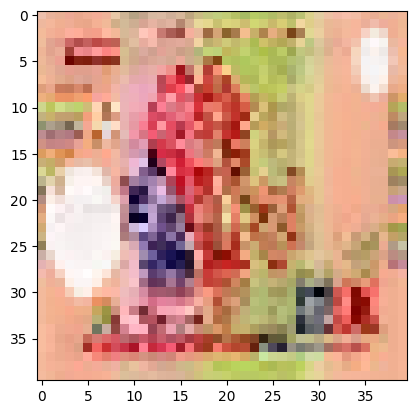

In [9]:
plt.imshow(X[501])
print(y[501])

In [10]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization, Input
from keras.optimizers import Adam #toc do hoc 0.01 with Adam
from keras.losses import categorical_crossentropy

In [11]:
batch_size = 64
epochs = 20
classes = 5

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3,3), activation= 'linear', input_shape= (40,40,3), padding = 'same'))
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(Flatten())
#-----------------------------------------------------------------------------------------------------------
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'] )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                    

In [13]:
train = model.fit(X, y, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
11/11 [==============================] - 3s 219ms/step - loss: 1.6569 - accuracy: 0.2914
Epoch 2/20
11/11 [==============================] - 2s 215ms/step - loss: 1.2923 - accuracy: 0.4540
Epoch 3/20
11/11 [==============================] - 2s 217ms/step - loss: 0.9761 - accuracy: 0.6288
Epoch 4/20
11/11 [==============================] - 3s 324ms/step - loss: 0.7327 - accuracy: 0.7255
Epoch 5/20
11/11 [==============================] - 3s 286ms/step - loss: 0.6743 - accuracy: 0.7485
Epoch 6/20
11/11 [==============================] - 2s 215ms/step - loss: 0.5042 - accuracy: 0.8344
Epoch 7/20
11/11 [==============================] - 2s 218ms/step - loss: 0.4103 - accuracy: 0.8635
Epoch 8/20
11/11 [==============================] - 2s 223ms/step - loss: 0.3035 - accuracy: 0.9003
Epoch 9/20
11/11 [==============================] - 3s 292ms/step - loss: 0.2842 - accuracy: 0.9095
Epoch 10/20
11/11 [==============================] - 4s 320ms/step - loss: 0.1770 - accuracy: 0.9387

In [14]:
folder = '/content/drive/MyDrive/Data_CNN/Test/tien'
tien = ['20nghin', '50nghin', '100nghin', '200nghin','500nghin']
X_test, y_test = list(), list()
for i in range (5):
  filename = folder +'/'+ tien[i] + '/'
  for file in listdir (filename):
    photo = load_img (filename + file, target_size=(40,40))
    photo = img_to_array(photo)
    X_test.append(photo)
    y_test.append(i)
X_test = asarray(X_test)
y_test = asarray(y_test)

In [15]:
print(X_test.shape)
print(y_test.shape)

(100, 40, 40, 3)
(100,)


In [16]:
from keras.utils import to_categorical
y_test = to_categorical(y_test)
X_test = X_test.astype('float32')/255

In [17]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 27ms/step - loss: 0.8017 - accuracy: 0.9000


[0.8017315864562988, 0.8999999761581421]

1/1 [==============================] - 0s 57ms/step
50nghin
50nghin


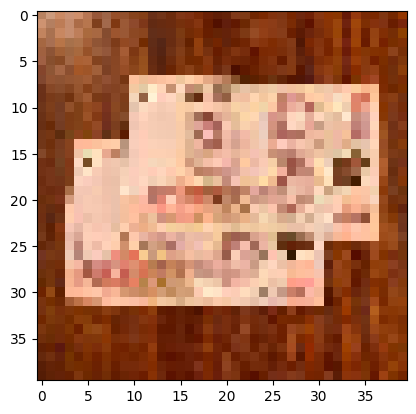

In [29]:
n = 21
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1,40,40,3)))
print(tien[pred.argmax()])
print(tien[y_test[n].argmax()])